In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator
%matplotlib inline
import seaborn as sns

In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [4]:
import kaleido

In [5]:
##Reading data
data = pd.read_csv("C:/mm/projects/316056_639173_bundle_archive/amazon.csv", encoding='latin1')
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
### Understanding the data ###
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [7]:
#Checking for nulls
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
##The months are not in english, translating them to english
data.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [9]:
d = {'Janeiro':'January','Fevereiro':'February','Março':'March','Abril':'April', 'Maio':'May', 'Junho':'June', 'Julho':'July',
    'Agosto':'August', 'Setembro':'September','Outubro':'October','Novembro':'November','Dezembro':'December'}
data['month'] = data['month'].map(d)
data.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [10]:
###Distribution of forest fires
data.number.describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [11]:
###Total fires reported from 1998 to 2017
data.number.sum()

698924.073

In [12]:
###Trying to extract year from the 'date' column, although we already have a year column
data['year_2'] = pd.DatetimeIndex(data['date']).year
data.head()

,year,state,month,number,date,year_2
0,1998,Acre,January,0.0,1998-01-01,1998
1,1999,Acre,January,0.0,1999-01-01,1999
2,2000,Acre,January,0.0,2000-01-01,2000
3,2001,Acre,January,0.0,2001-01-01,2001
4,2002,Acre,January,0.0,2002-01-01,2002


In [13]:
data.drop(['year_2'], axis=1, inplace=True)
#Since, its not needed, I am dropping it from the dataframe
data.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [14]:
##Examining fire trend over the years##
df = pd.DataFrame(data.groupby(['year']).number.sum().round(0)).reset_index()
df.columns = ['year','Total_fires']
df.head()

,year,Total_fires
0,1998,20014.0
1,1999,26883.0
2,2000,27351.0
3,2001,29072.0
4,2002,37391.0


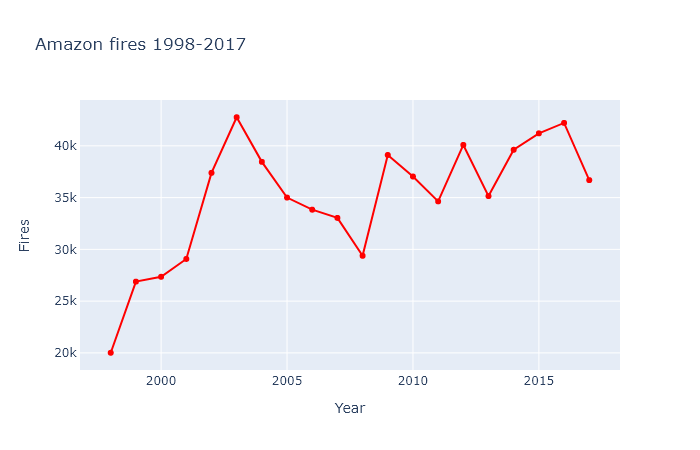

In [33]:
#Hover over the graph to uncover details
t_plot = go.Figure(go.Scatter(x= df.year, y=df.Total_fires, mode='lines+markers', line={'color':'red'}))
t_plot.update_layout(title = 'Amazon fires 1998-2017', xaxis_title = 'Year', yaxis_title = 'Fires')
#t_plot.to_image(format="png", engine="kaleido")
t_plot.show("png")

In [16]:
#Number of fires each year by month, state
data.groupby(['year', 'state', 'month']).number.sum().reset_index()

,year,state,month,number
0,1998,Acre,April,0.000
1,1998,Acre,August,130.000
2,1998,Acre,December,7.000
3,1998,Acre,February,0.000
4,1998,Acre,January,0.000
...,...,...,...,...
5492,2017,Tocantins,March,98.000
5493,2017,Tocantins,May,576.000
5494,2017,Tocantins,November,434.000
5495,2017,Tocantins,October,2.969


In [17]:
#How number of fires varied from 1998 to 2017
number_1998=data.number[data.year==1998].sum()
number_2017=data.number[data.year==2017].sum()

In [18]:
###Find increase in forest fires from 1998 to 2017
print("Percentage increase in fires from 1998 to 2017= ",round((number_2017-number_1998)/number_1998*100,2))

Percentage increase in fires from 1998 to 2017=  83.3


In [19]:
#Find top 10 years with most forest fires
top10_years = data.groupby('year').number.sum().nlargest(10).reset_index()
top10_years.head(10)

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39117.178
6,2004,38453.163
7,2002,37390.600
8,2010,37037.449
9,2017,36685.624


In [20]:
data.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [21]:
##Analyze the distribution of fires on a map of Brazil, for top 10 states

In [22]:
#Creating dataframe for states
states_df = pd.DataFrame(data.groupby('state').number.sum().round().nlargest(10).reset_index())
states_df.head()

,state,number
0,Mato Grosso,96246.0
1,Paraiba,52436.0
2,Sao Paulo,51121.0
3,Rio,45161.0
4,Bahia,44746.0


In [23]:
#Creating latitude and longitude for the states
lat=[-16.350000, -22.15847, -23.533773, -22.908333, -11.409874, -21.5089, -16.328547, -19.841644, -21.175, -3.416843]
long=[-56.666668, -43.29321, -46.625290, -43.196388, -41.280857, -43.3228, -48.953403, -43.986511, -43.01778, -65.856064]
states_df['lat'] = lat
states_df['long'] = long
states_df.head()

,state,number,lat,long
0,Mato Grosso,96246.0,-16.350000,-56.666668
1,Paraiba,52436.0,-22.158470,-43.293210
2,Sao Paulo,51121.0,-23.533773,-46.625290
3,Rio,45161.0,-22.908333,-43.196388
4,Bahia,44746.0,-11.409874,-41.280857


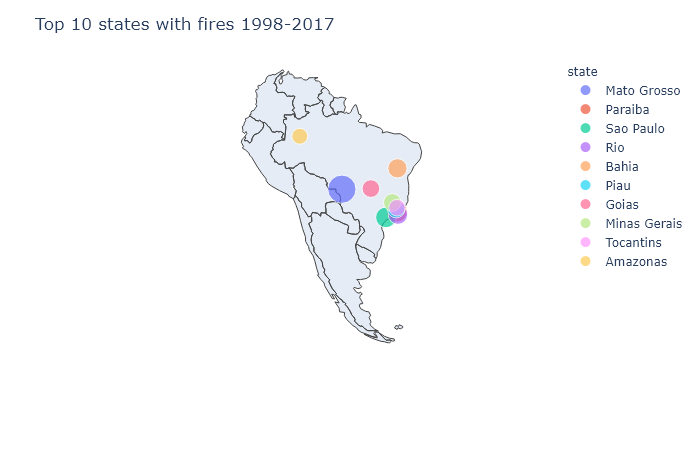

In [24]:
#plot geo plot
fig = px.scatter_geo(data_frame= states_df, scope = 'south america', lat='lat', lon='long', size = 'number', color='state', projection = 'hammer')
fig.update_layout(title_text = 'Top 10 states with fires 1998-2017')
fig.show("png")

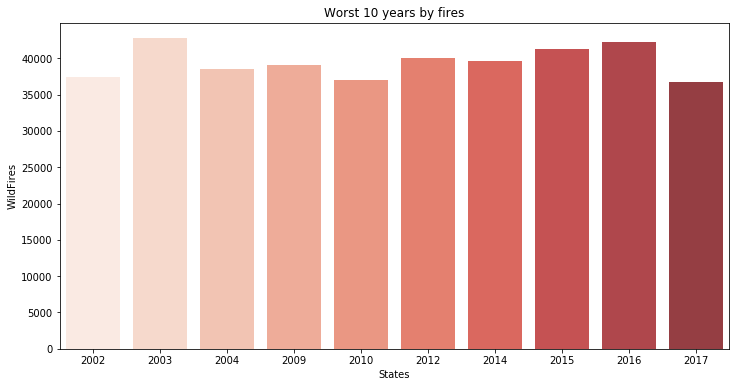

In [25]:
plt.figure(figsize = (12,6))
ax=sns.barplot(x=top10_years.year, y = top10_years.number, palette='Reds', alpha=0.85)
plt.title('Worst 10 years by fires')
plt.xlabel('States')
plt.ylabel('WildFires')
plt.show()

In [26]:
data.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [27]:
#Which months have the most fires?
top10_months = data.groupby('month').number.sum().sort_values(ascending=False).head(10).reset_index()
top10_months

,month,number
0,July,92326.113
1,October,88681.579
2,August,88050.435
3,November,85508.054
4,September,58578.305
5,December,57535.480
6,June,56010.675
7,January,47747.844
8,May,34731.363
9,February,30848.050


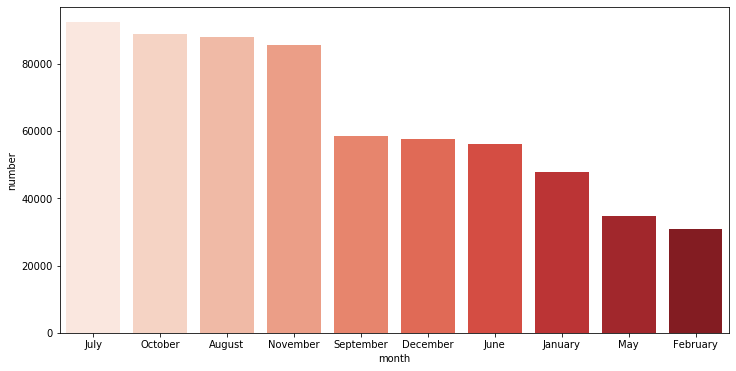

In [28]:
plt.figure(figsize = (12,6))
sns.barplot(x=top10_months.month, y=top10_months.number, palette='Reds')

In [29]:
data.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [30]:
##Find out the state with 3rd highest fires in input year##
year_check = int(input())

if year_check > 2017 or year_check < 1998:
    print("Enter Year between 1998 and 2017")
else:
    print("Correct year")
    year_check == year_check

2012
Correct year


In [31]:
data[data.year==2017].groupby('state').number.sum().nlargest(3).to_frame()

,number
state,
Mato Grosso,5661.327
Rio,4271.000
Paraiba,3052.706


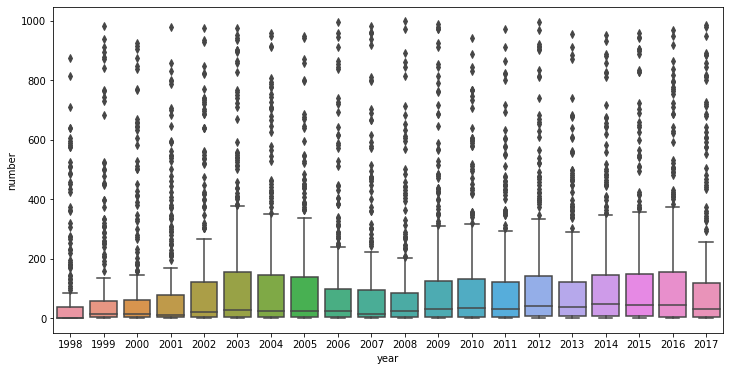

In [32]:
###Plotting fires by years###
plt.figure(figsize=(12,6))
sns.boxplot(data.year, data.number)